In [6]:
# MLFlow Experiment Tracking with Multiple Models

import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import IPython.display as display
import tempfile

In [7]:
# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split the data
X = data[iris.feature_names]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different feature combinations
feature_combinations = [
    iris.feature_names[:2],  # First two features
    iris.feature_names[2:],  # Last two features
    iris.feature_names       # All features
]


2025/02/26 09:17:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 09:17:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 09:17:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 09:17:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 09:17:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 09:18:02 


Summary of Experiment Results:
                                            features               model  \
0              [sepal length (cm), sepal width (cm)]        RandomForest   
1              [sepal length (cm), sepal width (cm)]  LogisticRegression   
2              [petal length (cm), petal width (cm)]        RandomForest   
3              [petal length (cm), petal width (cm)]  LogisticRegression   
4  [sepal length (cm), sepal width (cm), petal le...        RandomForest   
5  [sepal length (cm), sepal width (cm), petal le...  LogisticRegression   

   accuracy  precision    recall  f1_score  
0  0.755556   0.755820  0.755556  0.755193  
1  0.822222   0.833842  0.822222  0.817912  
2  1.000000   1.000000  1.000000  1.000000  
3  1.000000   1.000000  1.000000  1.000000  
4  1.000000   1.000000  1.000000  1.000000  
5  1.000000   1.000000  1.000000  1.000000  


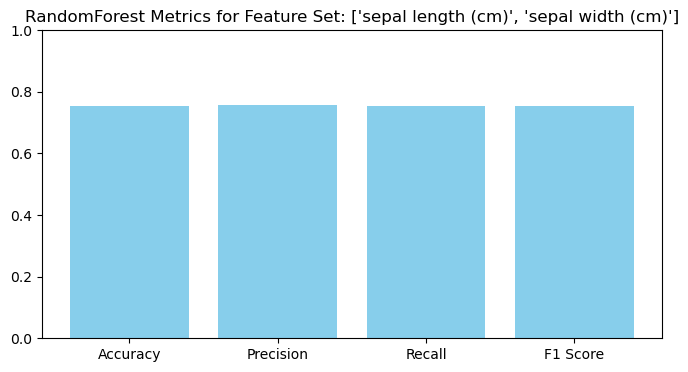

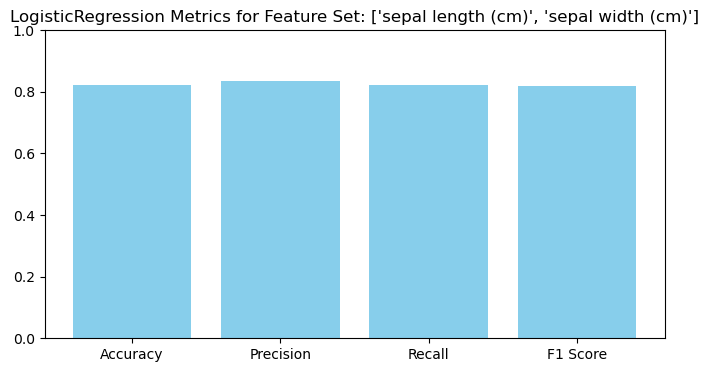

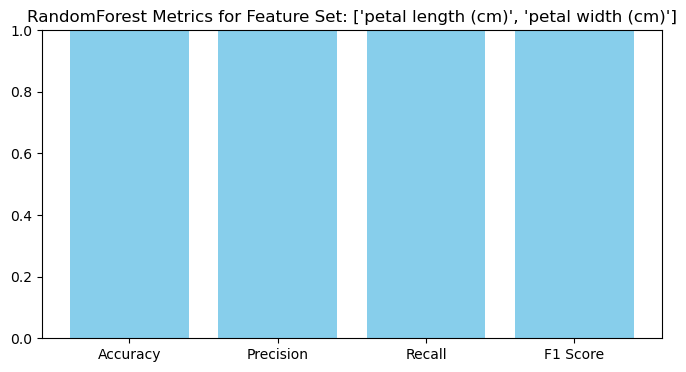

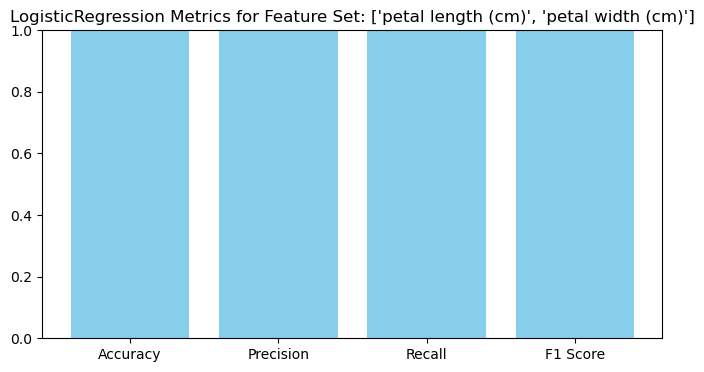

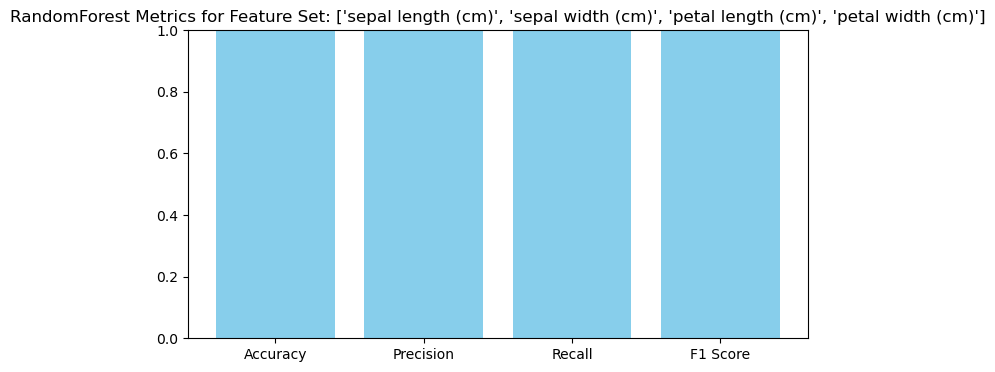

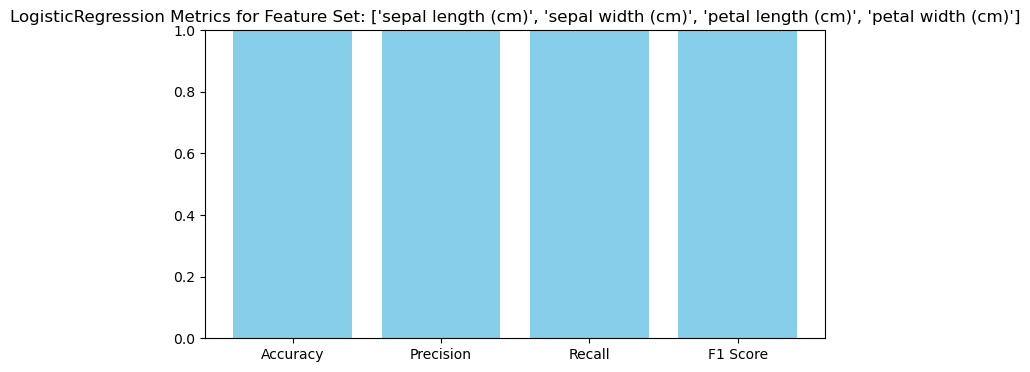

In [8]:

# Start MLFlow experiment
mlflow.set_experiment("MLFlow Experiment Tracking Example")

results = []

# Train models with different feature combinations
for features in feature_combinations:
    for model_name, model in zip(["RandomForest", "LogisticRegression"], 
                                 [RandomForestClassifier(random_state=42), LogisticRegression(max_iter=200)]):
        with mlflow.start_run():
            # Log feature combination and model type
            mlflow.log_param("features", features)
            mlflow.log_param("model_type", model_name)
            
            # Train the model
            model.fit(X_train[features], y_train)
            predictions = model.predict(X_test[features])
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions, average='weighted')
            recall = recall_score(y_test, predictions, average='weighted')
            f1 = f1_score(y_test, predictions, average='weighted')
            
            # Log metrics
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1_score", f1)
            
            # Create and log a plot of the metrics
            fig, ax = plt.subplots(figsize=(8, 4))
            metrics = [accuracy, precision, recall, f1]
            metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
            ax.bar(metric_names, metrics, color='skyblue')
            ax.set_title(f"{model_name} Metrics for Feature Set: {features}")
            ax.set_ylim(0, 1)
            
            # Save the plot to a temporary file and log it as an artifact
            temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
            plt.savefig(temp_file.name)
            mlflow.log_artifact(temp_file.name, artifact_path="plots")
            temp_file.close()
            
            # Log the model
            mlflow.sklearn.log_model(model, model_name)
            
            # Store results for summary
            results.append({
                "features": features,
                "model": model_name,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1_score": f1
            })

# Print summary of results
results_df = pd.DataFrame(results)
print("\nSummary of Experiment Results:")
print(results_df)

In [9]:
# Start MLFlow UI from the notebook
print("\nStarting MLFlow UI...")
process = subprocess.Popen(["mlflow", "ui", "--port", "5000"])  # Starts MLFlow UI on port 5000

# Wait a moment to ensure the server starts
time.sleep(3)

# Display a link to the MLFlow UI
display.display(display.Markdown("[Open MLFlow UI](http://localhost:5000)"))

print("MLFlow UI is running at http://localhost:5000. Press Ctrl+C in the terminal to stop it.")


Starting MLFlow UI...


[Open MLFlow UI](http://localhost:5000)

MLFlow UI is running at http://localhost:5000. Press Ctrl+C in the terminal to stop it.


In [10]:
!mlflow ui

^C
